# **DSL 25-1 Mathematics for ML 과제_Coding Problem**

### 기수 : 13기
### 이름 : 박세현

In [1]:
# 코랩에서 작성할 경우 아래 주석을 해제해주세요
# from google.colab import drive
# drive.mount('/content/drive')

필수 라이브러리 갖고오기

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import timeit

## **2-3**

해당 문제에서는 예시 사진을 이용해서 SVD가 어떻게 사진을 압축하는데에 사용될 수 있는지 확인하고, 임의의 사진에 이를 활용할 경우 그 용량이 실제로 줄어드는지, 정보는 어느정도 유지가 되는지 직접 체험해보겠습니다.

(TMI: 예시 사진 출처 = **12기 김민규** 일본 여행 사진)

경로 설정 (image.jpg 경로로 바꿔주세요.)

In [3]:
path_to_image = "./data//image.png"

이미지 출력해서 확인해보기 (**편의상 흑백을 사용할 예정입니다**)

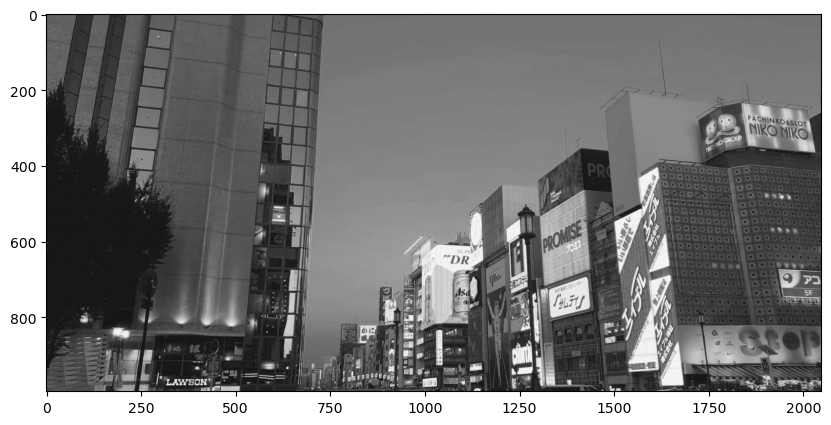

In [4]:
image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize = (10, 13))
plt.imshow(image, cmap = 'gray')

다음과 같이 이미지를 Float32 형태의 데이터로 바꾸겠습니다.

In [5]:
image_float = image.astype(np.float32)

이제 np.linalg.svd를 활용해 SVD를 해보겠습니다. 
여기서 np.linalg.svd 의 아웃풋으로는 총 $U$, 시그마 값, $V^\top$ 세 값이 나오게 되며, 시그마 값을 활용해 대각 원소로 그 값들을 가지는 대각 행렬을 만들겠습니다.

In [6]:
U, Sigma, Vt = np.linalg.svd(image_float)
Sigma_mat = np.zeros((image_float.shape[0], image_float.shape[1]))
np.fill_diagonal(Sigma_mat, Sigma)

# 시그마 행렬 확인 용도
print(Sigma_mat.shape)

(996, 2048)


 여기서부터는 해당 이미지에 대한 고유벡터로 특이값 내림차순 정렬 기준 상위 $70$ 개만 사용하겠습니다. (행렬의 나머지 원소들은 $0$으로 지정)

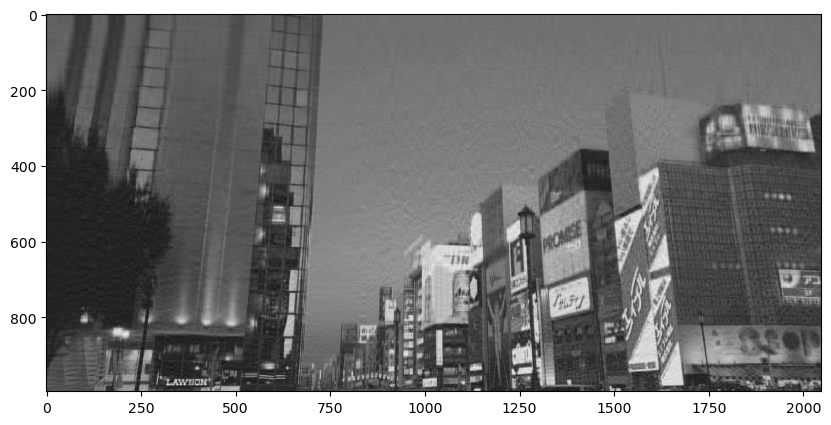

In [7]:
image_composition = np.matmul(U[:, :70], np.matmul(Sigma_mat[:70, :70], Vt[:70, :]))
fig = plt.figure(figsize=(10, 13))

plt.imshow(image_composition, cmap = 'gray')

전에 비해서 확실히 흐릿해졌으나 육안으로 그림의 정보는 여전히 확인이 가능합니다! 그렇다면 해당 사진과 이전 사진과 비교해 용량이 줄어들었는지, 관련하여 처리 속도의 개선 여부까지도 살펴보겠습니다.

In [8]:
def count_nonzero_full_image():
    return np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt)

def count_nonzero_compressed_image():
    return np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :])

full_image_time = 0
compressed_image_time = 0

for i in range(10) :
  full_image_time += timeit.timeit(count_nonzero_full_image, number=100)
  compressed_image_time += timeit.timeit(count_nonzero_compressed_image, number=100)

print("Image Float uses ", np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt), " Non-zero Elements")
print("Image Composition uses ", np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :]), " Non-zero Elements")
print(f"Processing Time for 10 Full Images: {round(full_image_time, 5)} seconds")
print(f"Processing Time for 10 Compressed Images: {round(compressed_image_time, 5)} seconds")

Image Float uses  5187316  Non-zero Elements
Image Composition uses  213150  Non-zero Elements
Processing Time for 10 Full Images: 13.66279 seconds
Processing Time for 10 Compressed Images: 0.4563 seconds


즉, SVD를 활용하면 더 적은 용량으로 원본의 정보를 충분히 살릴 수 있어 효율적으로 사용할 수 있음을 알 수 있습니다.

이제, 여러분의 사진을 이용해 이러한 과정을 다시 반복해 볼 차례입니다.

**위의 셀들을 활용해 여러분의 사진으로 SVD를 시도해보세요. 사용하는 고유벡터의 수를 조절하며 사진의 선명도와 처리 속도를 비교해보고 그 과정과 결과를 아래에 제시해주세요.**

In [6]:
path_to_image = "./data//sehra.JPG"

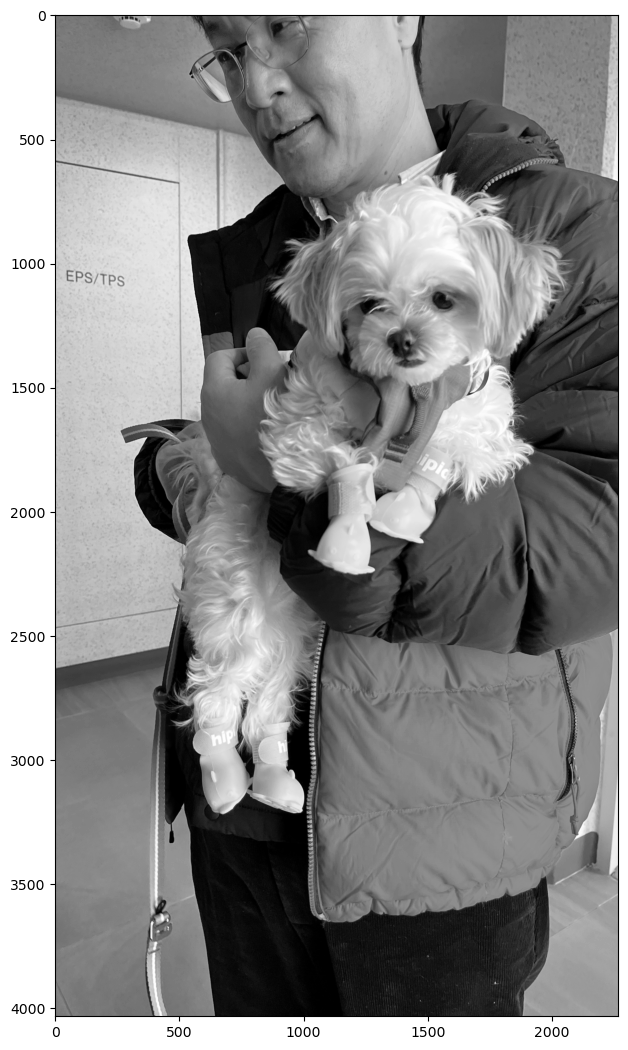

In [7]:
image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize = (10, 13))
plt.imshow(image, cmap = 'gray')

In [8]:
image_float = image.astype(np.float32)

In [9]:
U, Sigma, Vt = np.linalg.svd(image_float)
Sigma_mat = np.zeros((image_float.shape[0], image_float.shape[1]))
np.fill_diagonal(Sigma_mat, Sigma)

# 시그마 행렬 확인 용도
print(Sigma_mat.shape)

(4032, 2268)


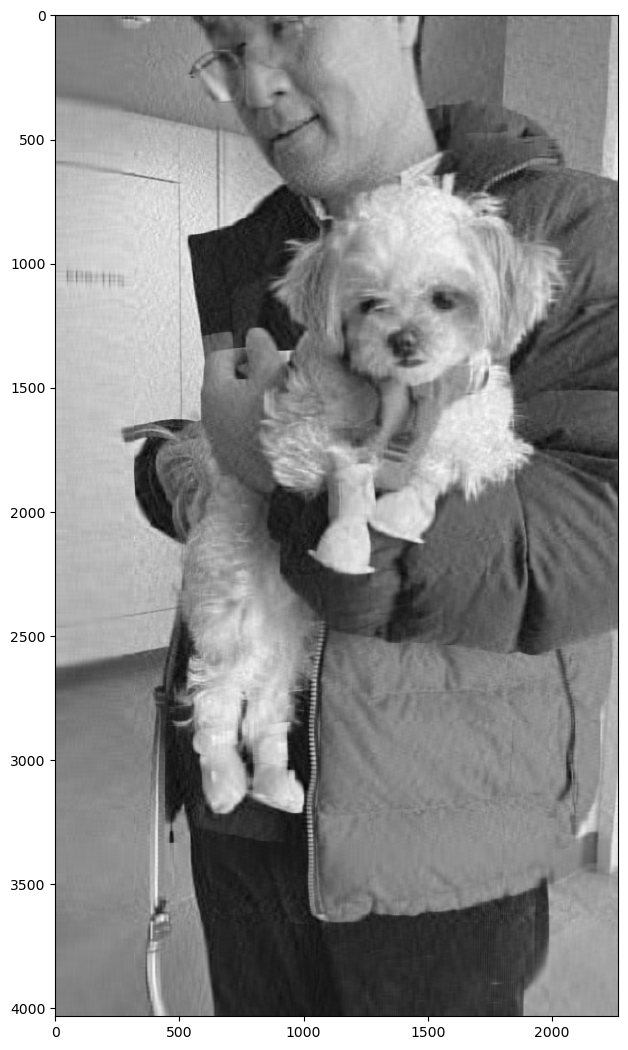

In [10]:
image_composition = np.matmul(U[:, :70], np.matmul(Sigma_mat[:70, :70], Vt[:70, :]))
fig = plt.figure(figsize=(10, 13))

plt.imshow(image_composition, cmap = 'gray')


In [11]:
def count_nonzero_full_image():
    return np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt)

def count_nonzero_compressed_image():
    return np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :])

full_image_time = 0
compressed_image_time = 0

for i in range(10) :
  full_image_time += timeit.timeit(count_nonzero_full_image, number=100)
  compressed_image_time += timeit.timeit(count_nonzero_compressed_image, number=100)

print("Image Float uses ", np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt), " Non-zero Elements")
print("Image Composition uses ", np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :]), " Non-zero Elements")
print(f"Processing Time for 10 Full Images: {round(full_image_time, 5)} seconds")
print(f"Processing Time for 10 Compressed Images: {round(compressed_image_time, 5)} seconds")


Image Float uses  21403116  Non-zero Elements
Image Composition uses  441070  Non-zero Elements
Processing Time for 10 Full Images: 45.88884 seconds
Processing Time for 10 Compressed Images: 0.71134 seconds
